In [16]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0532.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0282.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_1401.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0914.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0691.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0972.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0818.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0463.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0930.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_1323.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_1347.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_1354.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0704.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0

In [17]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout, BatchNormalization, Reshape
from sklearn.metrics import accuracy_score
from keras.optimizers import RMSprop,Adam

In [18]:
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

In [20]:
X_train = []
Y_train = []
image_size = 150
labels = ['glioma', 'meningioma', 'notumor', 'pituitary']
for i in labels:
    folderPath = os.path.join('/kaggle/input/brain-tumor-mri-dataset/Training', i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath, j))
        img = cv2.resize(img, (image_size, image_size))
        X_train.append(img)
        Y_train.append(i)
        
for i in labels:
    folderPath = os.path.join('/kaggle/input/brain-tumor-mri-dataset/Testing', i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath, j))
        img = cv2.resize(img, (image_size, image_size))
        X_train.append(img)
        Y_train.append(i)
        
X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [21]:
X_train, Y_train = shuffle(X_train, Y_train, random_state=101)
X_train.shape

(7023, 150, 150, 3)

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.2, random_state=101)

In [23]:
X_train.shape

(5618, 150, 150, 3)

In [24]:
X_test.shape

(1405, 150, 150, 3)

In [25]:
Y_train_new = []
for i in Y_train:
    Y_train_new.append(labels.index(i))
Y_train=Y_train_new
Y_train = tf.keras.utils.to_categorical(Y_train)

Y_test_new = []
for i in Y_test:
    Y_test_new.append(labels.index(i))
Y_test=Y_test_new
Y_test = tf.keras.utils.to_categorical(Y_test)

In [26]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(2, 2), activation='relu', input_shape=(150, 150, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size=(2, 2), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(4, activation='softmax'))

In [27]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 149, 149, 32)   │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 149, 149, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 73, 73, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 73, 73, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 82944)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │    42,467,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,478,948 (162.04 MB)

 Trainable params: 42,478,756 (162.04 MB)

 Non-trainable params: 192 (768.00 B)

In [28]:
model.compile(loss='categorical_crossentropy', optimizer='Adamax', metrics=['accuracy'])

In [29]:
history = model.fit(X_train, Y_train, epochs=20, batch_size=40, verbose=2, validation_split=0.1, shuffle=True)

Epoch 1/20


W0000 00:00:1711247501.353620    8820 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1711247509.145137    8822 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


127/127 - 14s - 114ms/step - accuracy: 0.7225 - loss: 5.8919 - val_accuracy: 0.7562 - val_loss: 0.8282
Epoch 2/20


W0000 00:00:1711247509.456158    8819 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


127/127 - 3s - 21ms/step - accuracy: 0.8576 - loss: 0.4333 - val_accuracy: 0.8577 - val_loss: 0.7642
Epoch 3/20
127/127 - 3s - 21ms/step - accuracy: 0.9068 - loss: 0.2616 - val_accuracy: 0.8327 - val_loss: 0.9540
Epoch 4/20
127/127 - 3s - 21ms/step - accuracy: 0.9292 - loss: 0.1913 - val_accuracy: 0.8648 - val_loss: 0.8303
Epoch 5/20
127/127 - 3s - 21ms/step - accuracy: 0.9496 - loss: 0.1371 - val_accuracy: 0.8523 - val_loss: 0.8794
Epoch 6/20
127/127 - 3s - 21ms/step - accuracy: 0.9608 - loss: 0.1177 - val_accuracy: 0.8754 - val_loss: 0.7843
Epoch 7/20
127/127 - 3s - 21ms/step - accuracy: 0.9684 - loss: 0.0890 - val_accuracy: 0.8808 - val_loss: 0.8177
Epoch 8/20
127/127 - 3s - 21ms/step - accuracy: 0.9713 - loss: 0.0932 - val_accuracy: 0.8719 - val_loss: 0.9258
Epoch 9/20
127/127 - 3s - 21ms/step - accuracy: 0.9733 - loss: 0.0756 - val_accuracy: 0.8790 - val_loss: 0.8312
Epoch 10/20
127/127 - 3s - 21ms/step - accuracy: 0.9798 - loss: 0.0565 - val_accuracy: 0.8826 - val_loss: 0.9018
Ep

In [30]:
history1 = model.fit(X_train, Y_train, epochs=20, batch_size=40, verbose=2, validation_split=0.1, shuffle=True)

Epoch 1/20
127/127 - 3s - 21ms/step - accuracy: 0.9943 - loss: 0.0168 - val_accuracy: 0.9039 - val_loss: 0.8343
Epoch 2/20
127/127 - 3s - 21ms/step - accuracy: 0.9953 - loss: 0.0185 - val_accuracy: 0.8843 - val_loss: 1.0626
Epoch 3/20
127/127 - 3s - 21ms/step - accuracy: 0.9964 - loss: 0.0114 - val_accuracy: 0.8719 - val_loss: 1.4720
Epoch 4/20
127/127 - 3s - 21ms/step - accuracy: 0.9958 - loss: 0.0112 - val_accuracy: 0.8648 - val_loss: 1.5298
Epoch 5/20
127/127 - 3s - 21ms/step - accuracy: 0.9962 - loss: 0.0108 - val_accuracy: 0.8808 - val_loss: 1.2765
Epoch 6/20
127/127 - 3s - 21ms/step - accuracy: 0.9958 - loss: 0.0133 - val_accuracy: 0.8683 - val_loss: 1.1500
Epoch 7/20
127/127 - 3s - 21ms/step - accuracy: 0.9913 - loss: 0.0250 - val_accuracy: 0.8345 - val_loss: 2.0235
Epoch 8/20
127/127 - 3s - 21ms/step - accuracy: 0.9949 - loss: 0.0151 - val_accuracy: 0.8808 - val_loss: 1.3334
Epoch 9/20
127/127 - 3s - 21ms/step - accuracy: 0.9990 - loss: 0.0045 - val_accuracy: 0.8737 - val_loss:

In [31]:
history2 = model.fit(X_train, Y_train, epochs=20, batch_size=40, verbose=2, validation_split=0.1, shuffle=True)

Epoch 1/20
127/127 - 3s - 22ms/step - accuracy: 0.9986 - loss: 0.0044 - val_accuracy: 0.9004 - val_loss: 1.1311
Epoch 2/20
127/127 - 3s - 21ms/step - accuracy: 0.9986 - loss: 0.0051 - val_accuracy: 0.9004 - val_loss: 1.0290
Epoch 3/20
127/127 - 3s - 21ms/step - accuracy: 0.9972 - loss: 0.0099 - val_accuracy: 0.9146 - val_loss: 0.7952
Epoch 4/20
127/127 - 3s - 21ms/step - accuracy: 0.9974 - loss: 0.0068 - val_accuracy: 0.9004 - val_loss: 1.0675
Epoch 5/20
127/127 - 3s - 21ms/step - accuracy: 0.9994 - loss: 0.0047 - val_accuracy: 0.9021 - val_loss: 1.0644
Epoch 6/20
127/127 - 3s - 21ms/step - accuracy: 0.9992 - loss: 0.0032 - val_accuracy: 0.9253 - val_loss: 0.9121
Epoch 7/20
127/127 - 3s - 21ms/step - accuracy: 0.9994 - loss: 0.0017 - val_accuracy: 0.9270 - val_loss: 0.8756
Epoch 8/20
127/127 - 3s - 21ms/step - accuracy: 0.9994 - loss: 0.0033 - val_accuracy: 0.9146 - val_loss: 0.9484
Epoch 9/20
127/127 - 3s - 21ms/step - accuracy: 0.9992 - loss: 0.0034 - val_accuracy: 0.8790 - val_loss:

In [32]:
history3 = model.fit(X_train, Y_train, epochs=20, batch_size=40, verbose=2, validation_split=0.1, shuffle=True)

Epoch 1/20
127/127 - 3s - 21ms/step - accuracy: 0.9970 - loss: 0.0101 - val_accuracy: 0.8968 - val_loss: 1.1631
Epoch 2/20
127/127 - 3s - 21ms/step - accuracy: 0.9982 - loss: 0.0072 - val_accuracy: 0.9181 - val_loss: 0.9335
Epoch 3/20
127/127 - 3s - 21ms/step - accuracy: 0.9990 - loss: 0.0029 - val_accuracy: 0.8701 - val_loss: 1.5215
Epoch 4/20
127/127 - 3s - 21ms/step - accuracy: 0.9990 - loss: 0.0026 - val_accuracy: 0.9093 - val_loss: 1.1734
Epoch 5/20
127/127 - 3s - 21ms/step - accuracy: 0.9998 - loss: 0.0012 - val_accuracy: 0.9093 - val_loss: 1.2507
Epoch 6/20
127/127 - 3s - 21ms/step - accuracy: 0.9990 - loss: 0.0031 - val_accuracy: 0.9128 - val_loss: 1.1148
Epoch 7/20
127/127 - 3s - 21ms/step - accuracy: 0.9996 - loss: 0.0012 - val_accuracy: 0.9128 - val_loss: 1.1142
Epoch 8/20
127/127 - 3s - 21ms/step - accuracy: 0.9998 - loss: 6.7736e-04 - val_accuracy: 0.9110 - val_loss: 1.0466
Epoch 9/20
127/127 - 3s - 21ms/step - accuracy: 0.9998 - loss: 8.7519e-04 - val_accuracy: 0.9164 - v

In [33]:
history4 = model.fit(X_train, Y_train, epochs=20, batch_size=40, verbose=2, validation_split=0.1, shuffle=True)

Epoch 1/20
127/127 - 3s - 21ms/step - accuracy: 0.9992 - loss: 0.0025 - val_accuracy: 0.9039 - val_loss: 1.1753
Epoch 2/20
127/127 - 3s - 21ms/step - accuracy: 0.9996 - loss: 0.0022 - val_accuracy: 0.9199 - val_loss: 0.9035
Epoch 3/20
127/127 - 3s - 21ms/step - accuracy: 0.9998 - loss: 0.0011 - val_accuracy: 0.9128 - val_loss: 1.0105
Epoch 4/20
127/127 - 3s - 21ms/step - accuracy: 0.9990 - loss: 0.0040 - val_accuracy: 0.9181 - val_loss: 1.0025
Epoch 5/20
127/127 - 3s - 21ms/step - accuracy: 0.9986 - loss: 0.0053 - val_accuracy: 0.9110 - val_loss: 1.0211
Epoch 6/20
127/127 - 3s - 21ms/step - accuracy: 0.9994 - loss: 0.0035 - val_accuracy: 0.9199 - val_loss: 0.9695
Epoch 7/20
127/127 - 3s - 21ms/step - accuracy: 0.9992 - loss: 0.0018 - val_accuracy: 0.9021 - val_loss: 1.2629
Epoch 8/20
127/127 - 3s - 21ms/step - accuracy: 0.9992 - loss: 0.0018 - val_accuracy: 0.9288 - val_loss: 0.9595
Epoch 9/20
127/127 - 3s - 21ms/step - accuracy: 0.9990 - loss: 0.0026 - val_accuracy: 0.8986 - val_loss:

In [35]:
import matplotlib.pyplot as plt

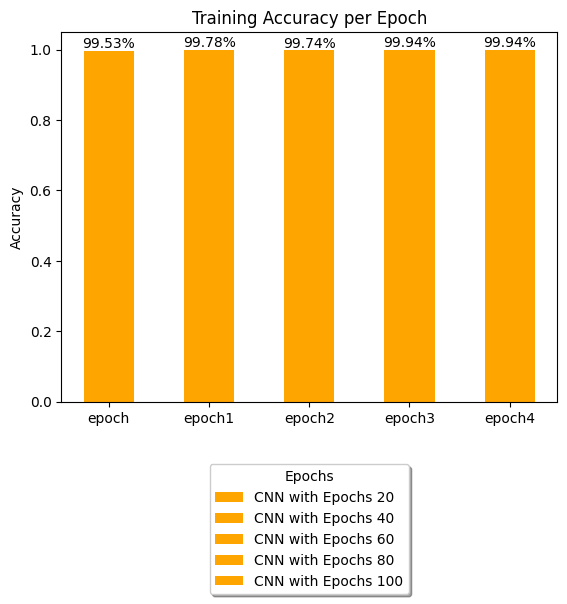

In [36]:
fig, ax = plt.subplots()

acc = history.history['accuracy'][-1]
acc1 = history1.history['accuracy'][-1]
acc2 = history2.history['accuracy'][-1]
acc3 = history3.history['accuracy'][-1]
acc4 = history4.history['accuracy'][-1]
accu_all=[acc, acc1, acc2, acc3, acc4]
epoch = len(history.history['accuracy']) 
epoch1 = len(history1.history['accuracy'])
epoch2 = len(history2.history['accuracy'])
epoch3 = len(history3.history['accuracy'])
epoch4 = len(history4.history['accuracy'])
epochs = ['epoch', 'epoch1', 'epoch2', 'epoch3','epoch4']
bar_labels = ['CNN with Epochs 20', 'CNN with Epochs 40', 'CNN with Epochs 60', 'CNN with Epochs 80', 'CNN with Epochs 100']
bar_colors = ['orange', 'orange', 'orange', 'orange','orange']
ax.bar(epochs, accu_all, label=bar_labels, color=bar_colors,width=0.5)
ax.set_ylabel('Accuracy')
ax.set_title('Training Accuracy per Epoch')
ax.legend(title='Epochs', loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=1)
for i, ac in enumerate(accu_all):
    plt.text(epochs[i], ac, f'{ac:.2%}', ha='center', va='bottom')
plt.show()
# train_acc = (history.history['accuracy'], history1.history['accuracy'], history2.history['accuracy'], history3.history['accuracy'])
# plt.plot(epochs, acc_all, 'b')
# plt.title('Training Accuracy per Epoch')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')

# plt.show()

In [37]:
img = cv2.imread('/kaggle/input/brain-tumor-mri-dataset/Testing/glioma/Te-gl_0014.jpg')
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape

(150, 150, 3)

In [38]:
img_array = img_array.reshape(1, 150, 150, 3)
img_array.shape

(1, 150, 150, 3)

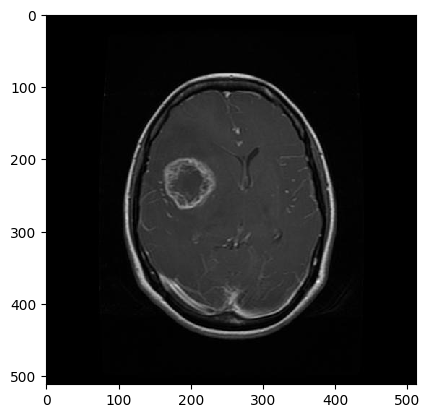

In [39]:
from tensorflow.keras.preprocessing import image
img = image.load_img('/kaggle/input/brain-tumor-mri-dataset/Testing/glioma/Te-gl_0014.jpg')
plt.imshow(img, interpolation='nearest')
plt.show()

In [40]:
a=model.predict(img_array)
indices = a.argmax()
indices

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 540ms/step


0

In [41]:
from sklearn.metrics import confusion_matrix
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(Y_test,axis=1)

44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step


In [42]:
cm = confusion_matrix(y_true,pred)
print(cm)

[[333  14   0   1]
 [ 43 270   6  10]
 [  2   2 403   4]
 [  1   0   0 316]]


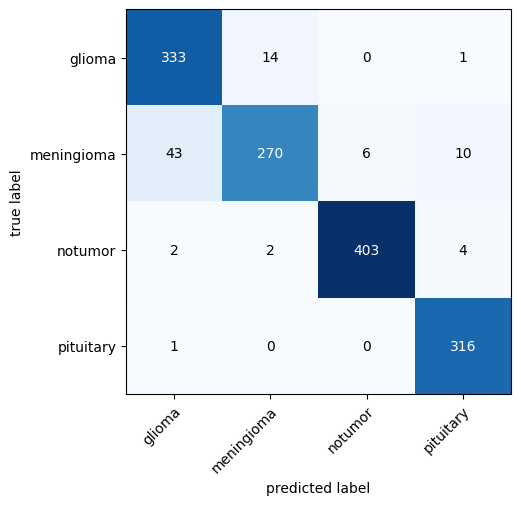

In [43]:
from mlxtend.plotting import plot_confusion_matrix
ax = plot_confusion_matrix(conf_mat=cm,figsize=(5,5),class_names=labels)
plt.show()

In [45]:
from sklearn.metrics import classification_report
cr = classification_report(y_true,pred,target_names=labels)
print(cr)

              precision    recall  f1-score   support

      glioma       0.88      0.96      0.92       348
  meningioma       0.94      0.82      0.88       329
     notumor       0.99      0.98      0.98       411
   pituitary       0.95      1.00      0.98       317

    accuracy                           0.94      1405
   macro avg       0.94      0.94      0.94      1405
weighted avg       0.94      0.94      0.94      1405



In [46]:
model.save('braintumor.h5')

For 70% Training Percentage


In [47]:
X_train1 = []
Y_train1 = []
image_size1 = 150
labels1 = ['glioma', 'meningioma', 'notumor', 'pituitary']
for i in labels1:
    folderPath1 = os.path.join('/kaggle/input/brain-tumor-mri-dataset/Training', i)
    for j in os.listdir(folderPath1):
        img1 = cv2.imread(os.path.join(folderPath1, j))
        img1 = cv2.resize(img1, (image_size1, image_size1))
        X_train1.append(img1)
        Y_train1.append(i)
        
for i in labels:
    folderPath1 = os.path.join('/kaggle/input/brain-tumor-mri-dataset/Testing', i)
    for j in os.listdir(folderPath1):
        img1 = cv2.imread(os.path.join(folderPath1, j))
        img1 = cv2.resize(img1, (image_size1, image_size1))
        X_train1.append(img1)
        Y_train1.append(i)
        
X_train1 = np.array(X_train1)
Y_train1 = np.array(Y_train1)

In [49]:
X_train1, Y_train1 = shuffle(X_train1, Y_train1, random_state=101)
X_train1.shape

(7023, 150, 150, 3)

In [50]:
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X_train1, Y_train1, test_size=0.3, random_state=101)

In [51]:
X_train1.shape

(4916, 150, 150, 3)

In [52]:
X_test1.shape

(2107, 150, 150, 3)

In [53]:
Y_train1_new = []
for i in Y_train1:
    Y_train1_new.append(labels1.index(i))
Y_train1=Y_train1_new
Y_train1 = tf.keras.utils.to_categorical(Y_train1)

Y_test1_new = []
for i in Y_test1:
    Y_test1_new.append(labels1.index(i))
Y_test1=Y_test1_new
Y_test1 = tf.keras.utils.to_categorical(Y_test1)

In [55]:
model1 = tf.keras.Sequential()
model1.add(Conv2D(32, kernel_size=(2, 2), activation='relu', input_shape=(150, 150, 3)))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))
model1.add(Conv2D(64, kernel_size=(2, 2), activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))
model1.add(Flatten())
model1.add(Dense(512, activation='relu'))
model1.add(Dropout(0.25))
model1.add(Dense(4, activation='softmax'))

In [56]:
model1.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 149, 149, 32)   │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 149, 149, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 73, 73, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 73, 73, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 82944)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 512)            │    42,467,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,478,948 (162.04 MB)

 Trainable params: 42,478,756 (162.04 MB)

 Non-trainable params: 192 (768.00 B)

In [57]:
model1.compile(loss='categorical_crossentropy', optimizer='Adamax', metrics=['accuracy'])

In [58]:
history_0 = model1.fit(X_train1, Y_train1, epochs=20, batch_size=40, verbose=2, validation_split=0.1, shuffle=True)

Epoch 1/20


W0000 00:00:1711247899.934335    8820 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1711247909.055387    8819 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


111/111 - 17s - 153ms/step - accuracy: 0.7141 - loss: 7.3397 - val_accuracy: 0.6768 - val_loss: 1.7009
Epoch 2/20
111/111 - 2s - 21ms/step - accuracy: 0.8700 - loss: 0.4232 - val_accuracy: 0.8455 - val_loss: 0.7168
Epoch 3/20
111/111 - 2s - 21ms/step - accuracy: 0.9078 - loss: 0.2651 - val_accuracy: 0.8516 - val_loss: 0.8595
Epoch 4/20
111/111 - 2s - 21ms/step - accuracy: 0.9333 - loss: 0.1946 - val_accuracy: 0.8780 - val_loss: 0.7753
Epoch 5/20
111/111 - 2s - 21ms/step - accuracy: 0.9521 - loss: 0.1356 - val_accuracy: 0.8740 - val_loss: 0.7929
Epoch 6/20
111/111 - 2s - 21ms/step - accuracy: 0.9620 - loss: 0.1145 - val_accuracy: 0.8557 - val_loss: 0.8907
Epoch 7/20
111/111 - 2s - 21ms/step - accuracy: 0.9715 - loss: 0.0935 - val_accuracy: 0.8699 - val_loss: 0.8911
Epoch 8/20
111/111 - 2s - 21ms/step - accuracy: 0.9767 - loss: 0.0734 - val_accuracy: 0.8780 - val_loss: 0.7699
Epoch 9/20
111/111 - 3s - 23ms/step - accuracy: 0.9812 - loss: 0.0629 - val_accuracy: 0.8923 - val_loss: 0.6961
E

In [59]:
history_1 = model1.fit(X_train1, Y_train1, epochs=20, batch_size=40, verbose=2, validation_split=0.1, shuffle=True)

Epoch 1/20
111/111 - 2s - 22ms/step - accuracy: 0.9957 - loss: 0.0127 - val_accuracy: 0.9085 - val_loss: 0.6226
Epoch 2/20
111/111 - 2s - 21ms/step - accuracy: 0.9943 - loss: 0.0202 - val_accuracy: 0.8923 - val_loss: 0.8167
Epoch 3/20
111/111 - 2s - 21ms/step - accuracy: 0.9943 - loss: 0.0168 - val_accuracy: 0.8659 - val_loss: 1.0846
Epoch 4/20
111/111 - 2s - 21ms/step - accuracy: 0.9966 - loss: 0.0143 - val_accuracy: 0.8821 - val_loss: 0.8910
Epoch 5/20
111/111 - 2s - 21ms/step - accuracy: 0.9955 - loss: 0.0161 - val_accuracy: 0.8841 - val_loss: 0.9615
Epoch 6/20
111/111 - 2s - 21ms/step - accuracy: 0.9964 - loss: 0.0109 - val_accuracy: 0.9004 - val_loss: 0.7801
Epoch 7/20
111/111 - 2s - 21ms/step - accuracy: 0.9973 - loss: 0.0095 - val_accuracy: 0.9126 - val_loss: 0.6040
Epoch 8/20
111/111 - 2s - 21ms/step - accuracy: 0.9953 - loss: 0.0161 - val_accuracy: 0.8821 - val_loss: 0.9044
Epoch 9/20
111/111 - 2s - 21ms/step - accuracy: 0.9941 - loss: 0.0162 - val_accuracy: 0.8943 - val_loss:

In [60]:
history_2 = model1.fit(X_train1, Y_train1, epochs=20, batch_size=40, verbose=2, validation_split=0.1, shuffle=True)

Epoch 1/20
111/111 - 2s - 22ms/step - accuracy: 0.9984 - loss: 0.0053 - val_accuracy: 0.9065 - val_loss: 0.7454
Epoch 2/20
111/111 - 2s - 21ms/step - accuracy: 0.9962 - loss: 0.0115 - val_accuracy: 0.9045 - val_loss: 0.7589
Epoch 3/20
111/111 - 2s - 21ms/step - accuracy: 0.9975 - loss: 0.0050 - val_accuracy: 0.9146 - val_loss: 0.6452
Epoch 4/20
111/111 - 2s - 21ms/step - accuracy: 0.9986 - loss: 0.0062 - val_accuracy: 0.9126 - val_loss: 0.6621
Epoch 5/20
111/111 - 2s - 21ms/step - accuracy: 0.9982 - loss: 0.0084 - val_accuracy: 0.9167 - val_loss: 0.7034
Epoch 6/20
111/111 - 2s - 20ms/step - accuracy: 0.9986 - loss: 0.0033 - val_accuracy: 0.9390 - val_loss: 0.4951
Epoch 7/20
111/111 - 2s - 21ms/step - accuracy: 0.9982 - loss: 0.0049 - val_accuracy: 0.9167 - val_loss: 0.7104
Epoch 8/20
111/111 - 2s - 21ms/step - accuracy: 0.9989 - loss: 0.0051 - val_accuracy: 0.9187 - val_loss: 0.6522
Epoch 9/20
111/111 - 2s - 21ms/step - accuracy: 0.9982 - loss: 0.0075 - val_accuracy: 0.9085 - val_loss:

In [61]:
history_3 = model1.fit(X_train1, Y_train1, epochs=20, batch_size=40, verbose=2, validation_split=0.1, shuffle=True)

Epoch 1/20
111/111 - 2s - 21ms/step - accuracy: 0.9995 - loss: 0.0023 - val_accuracy: 0.9228 - val_loss: 0.6944
Epoch 2/20
111/111 - 2s - 20ms/step - accuracy: 0.9995 - loss: 0.0014 - val_accuracy: 0.9085 - val_loss: 0.8479
Epoch 3/20
111/111 - 2s - 21ms/step - accuracy: 0.9991 - loss: 0.0020 - val_accuracy: 0.9167 - val_loss: 0.7414
Epoch 4/20
111/111 - 2s - 21ms/step - accuracy: 1.0000 - loss: 5.1844e-04 - val_accuracy: 0.9350 - val_loss: 0.6817
Epoch 5/20
111/111 - 2s - 21ms/step - accuracy: 0.9986 - loss: 0.0027 - val_accuracy: 0.9065 - val_loss: 0.9654
Epoch 6/20
111/111 - 2s - 21ms/step - accuracy: 0.9977 - loss: 0.0091 - val_accuracy: 0.9167 - val_loss: 0.8242
Epoch 7/20
111/111 - 2s - 21ms/step - accuracy: 1.0000 - loss: 8.2156e-04 - val_accuracy: 0.9146 - val_loss: 0.8679
Epoch 8/20
111/111 - 2s - 21ms/step - accuracy: 0.9995 - loss: 0.0016 - val_accuracy: 0.9187 - val_loss: 0.8402
Epoch 9/20
111/111 - 2s - 21ms/step - accuracy: 0.9998 - loss: 0.0024 - val_accuracy: 0.9106 - v

In [62]:
history_4 = model1.fit(X_train1, Y_train1, epochs=20, batch_size=40, verbose=2, validation_split=0.1, shuffle=True)

Epoch 1/20
111/111 - 2s - 22ms/step - accuracy: 1.0000 - loss: 5.6045e-04 - val_accuracy: 0.9085 - val_loss: 0.8939
Epoch 2/20
111/111 - 2s - 21ms/step - accuracy: 0.9998 - loss: 0.0011 - val_accuracy: 0.9207 - val_loss: 0.7204
Epoch 3/20
111/111 - 2s - 21ms/step - accuracy: 0.9993 - loss: 0.0020 - val_accuracy: 0.9268 - val_loss: 0.7029
Epoch 4/20
111/111 - 2s - 21ms/step - accuracy: 0.9995 - loss: 0.0018 - val_accuracy: 0.9248 - val_loss: 0.8232
Epoch 5/20
111/111 - 2s - 21ms/step - accuracy: 0.9989 - loss: 0.0030 - val_accuracy: 0.9207 - val_loss: 0.8453
Epoch 6/20
111/111 - 2s - 21ms/step - accuracy: 1.0000 - loss: 2.3149e-04 - val_accuracy: 0.9167 - val_loss: 0.7977
Epoch 7/20
111/111 - 2s - 21ms/step - accuracy: 0.9993 - loss: 0.0023 - val_accuracy: 0.9207 - val_loss: 0.8612
Epoch 8/20
111/111 - 2s - 21ms/step - accuracy: 0.9984 - loss: 0.0043 - val_accuracy: 0.9187 - val_loss: 0.8360
Epoch 9/20
111/111 - 2s - 21ms/step - accuracy: 0.9986 - loss: 0.0037 - val_accuracy: 0.9248 - v

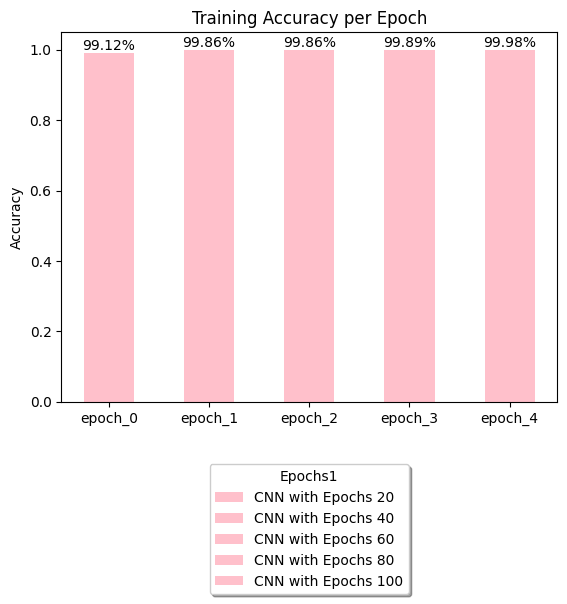

In [63]:
fig, ax1 = plt.subplots()

acc_0 = history_0.history['accuracy'][-1]
acc_1 = history_1.history['accuracy'][-1]
acc_2 = history_2.history['accuracy'][-1]
acc_3 = history_3.history['accuracy'][-1]
acc_4 = history_4.history['accuracy'][-1]
accu__all=[acc_0, acc_1, acc_2, acc_3, acc_4]
epoch_0 = len(history_0.history['accuracy']) 
epoch_1 = len(history_1.history['accuracy'])
epoch_2 = len(history_2.history['accuracy'])
epoch_3 = len(history_3.history['accuracy'])
epoch_4 = len(history_4.history['accuracy'])
epochs1 = ['epoch_0', 'epoch_1', 'epoch_2', 'epoch_3','epoch_4']
bar_labels = ['CNN with Epochs 20', 'CNN with Epochs 40', 'CNN with Epochs 60', 'CNN with Epochs 80', 'CNN with Epochs 100']
bar_colors = ['pink', 'pink', 'pink', 'pink','pink']
ax1.bar(epochs1, accu__all, label=bar_labels, color=bar_colors,width=0.5)
ax1.set_ylabel('Accuracy')
ax1.set_title('Training Accuracy per Epoch')
ax1.legend(title='Epochs1', loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=1)
for i, ac in enumerate(accu__all):
    plt.text(epochs1[i], ac, f'{ac:.2%}', ha='center', va='bottom')
plt.show()
# train_acc = (history.history['accuracy'], history1.history['accuracy'], history2.history['accuracy'], history3.history['accuracy'])
# plt.plot(epochs, acc_all, 'b')
# plt.title('Training Accuracy per Epoch')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')

# plt.show()

In [64]:
img1 = cv2.imread('/kaggle/input/brain-tumor-mri-dataset/Testing/glioma/Te-gl_0014.jpg')
img1 = cv2.resize(img1,(150,150))
img_array1 = np.array(img1)
img_array1.shape

(150, 150, 3)

In [65]:
img_array1 = img_array1.reshape(1, 150, 150, 3)
img_array1.shape

(1, 150, 150, 3)

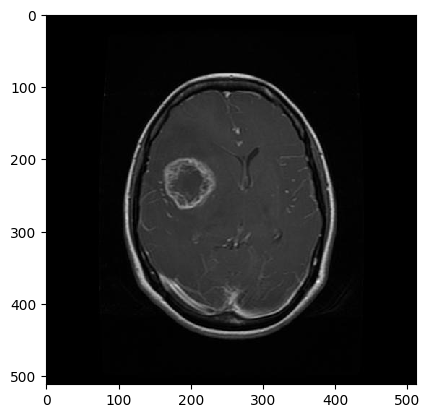

In [66]:
from tensorflow.keras.preprocessing import image
img1 = image.load_img('/kaggle/input/brain-tumor-mri-dataset/Testing/glioma/Te-gl_0014.jpg')
plt.imshow(img1, interpolation='nearest')
plt.show()

In [67]:
a1=model1.predict(img_array1)
indices1 = a1.argmax()
indices1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step


0

In [68]:
from sklearn.metrics import confusion_matrix
pred1 = model.predict(X_test1)
pred1 = np.argmax(pred1,axis=1)
y_true1 = np.argmax(Y_test1,axis=1)

66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


In [69]:
cm1 = confusion_matrix(y_true1,pred1)
print(cm1)

[[478   7   0   0]
 [ 50 448   7   4]
 [  2   1 622   4]
 [  1   0   0 483]]


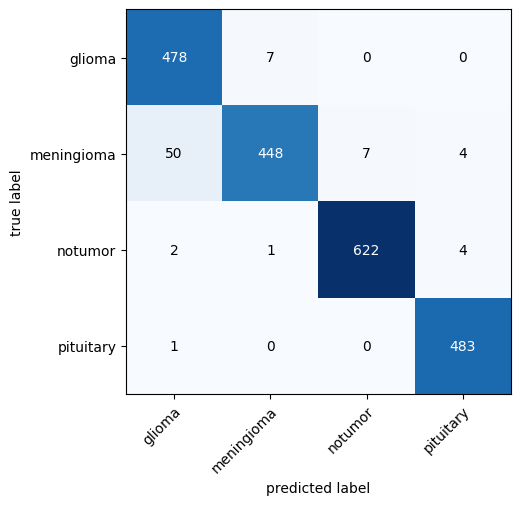

In [70]:
from mlxtend.plotting import plot_confusion_matrix
ax1 = plot_confusion_matrix(conf_mat=cm1,figsize=(5,5),class_names=labels1)
plt.show()

In [71]:
from sklearn.metrics import classification_report
cr1 = classification_report(y_true1,pred1,target_names=labels1)
print(cr1)

              precision    recall  f1-score   support

      glioma       0.90      0.99      0.94       485
  meningioma       0.98      0.88      0.93       509
     notumor       0.99      0.99      0.99       629
   pituitary       0.98      1.00      0.99       484

    accuracy                           0.96      2107
   macro avg       0.96      0.96      0.96      2107
weighted avg       0.97      0.96      0.96      2107



In [72]:
model1.save('braintumor.h5')

For 60% Training Percentage

In [73]:
X_train2 = []
Y_train2 = []
image_size2 = 150
labels2 = ['glioma', 'meningioma', 'notumor', 'pituitary']
for i in labels2:
    folderPath2 = os.path.join('/kaggle/input/brain-tumor-mri-dataset/Training', i)
    for j in os.listdir(folderPath2):
        img2 = cv2.imread(os.path.join(folderPath2, j))
        img2 = cv2.resize(img2, (image_size2, image_size2))
        X_train2.append(img2)
        Y_train2.append(i)
        
for i in labels:
    folderPath2 = os.path.join('/kaggle/input/brain-tumor-mri-dataset/Testing', i)
    for j in os.listdir(folderPath2):
        img2 = cv2.imread(os.path.join(folderPath2, j))
        img2 = cv2.resize(img2, (image_size2, image_size2))
        X_train2.append(img2)
        Y_train2.append(i)
        
X_train2 = np.array(X_train2)
Y_train2 = np.array(Y_train2)

In [75]:
X_train2, Y_train2 = shuffle(X_train2, Y_train2, random_state=101)
X_train2.shape

(7023, 150, 150, 3)

In [79]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X_train2, Y_train2, test_size=0.4, random_state=101)

In [80]:
X_train2.shape

(2527, 150, 150, 3)

In [81]:
X_test2.shape

(1686, 150, 150, 3)

In [82]:
Y_train2_new = []
for i in Y_train2:
    Y_train2_new.append(labels2.index(i))
Y_train2=Y_train2_new
Y_train2 = tf.keras.utils.to_categorical(Y_train2)

Y_test2_new = []
for i in Y_test2:
    Y_test2_new.append(labels2.index(i))
Y_test2=Y_test2_new
Y_test2 = tf.keras.utils.to_categorical(Y_test2)

In [84]:
model2 = tf.keras.Sequential()
model2.add(Conv2D(32, kernel_size=(2, 2), activation='relu', input_shape=(150, 150, 3)))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))
model2.add(Conv2D(64, kernel_size=(2, 2), activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))
model2.add(Flatten())
model2.add(Dense(512, activation='relu'))
model2.add(Dropout(0.25))
model2.add(Dense(4, activation='softmax'))

In [85]:
model2.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 149, 149, 32)   │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 149, 149, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 73, 73, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 73, 73, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 82944)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 512)            │    42,467,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,478,948 (162.04 MB)

 Trainable params: 42,478,756 (162.04 MB)

 Non-trainable params: 192 (768.00 B)

In [86]:
model2.compile(loss='categorical_crossentropy', optimizer='Adamax', metrics=['accuracy'])

In [87]:
history__0 = model2.fit(X_train2, Y_train2, epochs=20, batch_size=40, verbose=2, validation_split=0.1, shuffle=True)

Epoch 1/20


W0000 00:00:1711248300.148857    8821 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1711248308.370384    8820 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


57/57 - 16s - 279ms/step - accuracy: 0.6504 - loss: 13.0722 - val_accuracy: 0.3913 - val_loss: 18.2931
Epoch 2/20
57/57 - 1s - 21ms/step - accuracy: 0.8171 - loss: 1.2000 - val_accuracy: 0.7115 - val_loss: 1.7597
Epoch 3/20
57/57 - 1s - 22ms/step - accuracy: 0.8813 - loss: 0.3796 - val_accuracy: 0.7668 - val_loss: 1.2079
Epoch 4/20
57/57 - 1s - 22ms/step - accuracy: 0.9169 - loss: 0.2578 - val_accuracy: 0.7470 - val_loss: 1.5219
Epoch 5/20
57/57 - 1s - 21ms/step - accuracy: 0.9367 - loss: 0.1811 - val_accuracy: 0.7866 - val_loss: 1.6496
Epoch 6/20
57/57 - 1s - 21ms/step - accuracy: 0.9613 - loss: 0.1358 - val_accuracy: 0.7787 - val_loss: 1.7943
Epoch 7/20
57/57 - 1s - 21ms/step - accuracy: 0.9657 - loss: 0.1107 - val_accuracy: 0.7747 - val_loss: 1.9906
Epoch 8/20
57/57 - 1s - 21ms/step - accuracy: 0.9670 - loss: 0.1108 - val_accuracy: 0.7787 - val_loss: 1.8990
Epoch 9/20
57/57 - 1s - 22ms/step - accuracy: 0.9785 - loss: 0.0727 - val_accuracy: 0.7747 - val_loss: 1.9945
Epoch 10/20
57/57

In [88]:
history__1 = model2.fit(X_train2, Y_train2, epochs=20, batch_size=40, verbose=2, validation_split=0.1, shuffle=True)

Epoch 1/20
57/57 - 1s - 22ms/step - accuracy: 0.9894 - loss: 0.0446 - val_accuracy: 0.8063 - val_loss: 1.9836
Epoch 2/20
57/57 - 1s - 21ms/step - accuracy: 0.9908 - loss: 0.0297 - val_accuracy: 0.8103 - val_loss: 1.8787
Epoch 3/20
57/57 - 1s - 21ms/step - accuracy: 0.9952 - loss: 0.0233 - val_accuracy: 0.8103 - val_loss: 1.9270
Epoch 4/20
57/57 - 1s - 21ms/step - accuracy: 0.9956 - loss: 0.0174 - val_accuracy: 0.8182 - val_loss: 1.8450
Epoch 5/20
57/57 - 1s - 21ms/step - accuracy: 0.9938 - loss: 0.0234 - val_accuracy: 0.8142 - val_loss: 1.9609
Epoch 6/20
57/57 - 1s - 21ms/step - accuracy: 0.9956 - loss: 0.0209 - val_accuracy: 0.8142 - val_loss: 1.9615
Epoch 7/20
57/57 - 1s - 21ms/step - accuracy: 0.9903 - loss: 0.0319 - val_accuracy: 0.8261 - val_loss: 1.9029
Epoch 8/20
57/57 - 1s - 21ms/step - accuracy: 0.9965 - loss: 0.0246 - val_accuracy: 0.8221 - val_loss: 1.9160
Epoch 9/20
57/57 - 1s - 21ms/step - accuracy: 0.9952 - loss: 0.0177 - val_accuracy: 0.8261 - val_loss: 1.8223
Epoch 10/2

In [89]:
history__2 = model2.fit(X_train2, Y_train2, epochs=20, batch_size=40, verbose=2, validation_split=0.1, shuffle=True)

Epoch 1/20
57/57 - 1s - 23ms/step - accuracy: 0.9996 - loss: 0.0035 - val_accuracy: 0.8379 - val_loss: 1.9799
Epoch 2/20
57/57 - 1s - 22ms/step - accuracy: 1.0000 - loss: 0.0024 - val_accuracy: 0.8498 - val_loss: 1.9131
Epoch 3/20
57/57 - 1s - 22ms/step - accuracy: 0.9991 - loss: 0.0048 - val_accuracy: 0.8300 - val_loss: 2.0979
Epoch 4/20
57/57 - 1s - 21ms/step - accuracy: 0.9974 - loss: 0.0064 - val_accuracy: 0.8340 - val_loss: 2.0442
Epoch 5/20
57/57 - 1s - 22ms/step - accuracy: 0.9965 - loss: 0.0101 - val_accuracy: 0.8419 - val_loss: 2.0291
Epoch 6/20
57/57 - 1s - 21ms/step - accuracy: 0.9991 - loss: 0.0049 - val_accuracy: 0.8419 - val_loss: 2.1277
Epoch 7/20
57/57 - 1s - 21ms/step - accuracy: 1.0000 - loss: 0.0047 - val_accuracy: 0.8340 - val_loss: 2.0781
Epoch 8/20
57/57 - 1s - 21ms/step - accuracy: 1.0000 - loss: 0.0026 - val_accuracy: 0.8419 - val_loss: 2.0888
Epoch 9/20
57/57 - 1s - 22ms/step - accuracy: 1.0000 - loss: 0.0022 - val_accuracy: 0.8538 - val_loss: 2.0004
Epoch 10/2

In [91]:
history__3 = model2.fit(X_train2, Y_train2, epochs=20, batch_size=40, verbose=2, validation_split=0.1, shuffle=True)

Epoch 1/20
57/57 - 1s - 22ms/step - accuracy: 0.9991 - loss: 0.0026 - val_accuracy: 0.8498 - val_loss: 1.8100
Epoch 2/20
57/57 - 1s - 21ms/step - accuracy: 0.9991 - loss: 0.0021 - val_accuracy: 0.8656 - val_loss: 1.7828
Epoch 3/20
57/57 - 1s - 21ms/step - accuracy: 0.9996 - loss: 0.0017 - val_accuracy: 0.8538 - val_loss: 1.9224
Epoch 4/20
57/57 - 1s - 22ms/step - accuracy: 0.9996 - loss: 0.0019 - val_accuracy: 0.8577 - val_loss: 1.8734
Epoch 5/20
57/57 - 1s - 21ms/step - accuracy: 1.0000 - loss: 6.5295e-04 - val_accuracy: 0.8617 - val_loss: 1.8945
Epoch 6/20
57/57 - 1s - 22ms/step - accuracy: 1.0000 - loss: 4.1999e-04 - val_accuracy: 0.8577 - val_loss: 1.9877
Epoch 7/20
57/57 - 1s - 21ms/step - accuracy: 1.0000 - loss: 5.1839e-04 - val_accuracy: 0.8577 - val_loss: 1.9894
Epoch 8/20
57/57 - 1s - 21ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 0.8538 - val_loss: 1.9459
Epoch 9/20
57/57 - 1s - 22ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 0.8538 - val_loss: 2.034

In [92]:
history__4 = model2.fit(X_train2, Y_train2, epochs=20, batch_size=40, verbose=2, validation_split=0.1, shuffle=True)

Epoch 1/20
57/57 - 1s - 22ms/step - accuracy: 0.9947 - loss: 0.0202 - val_accuracy: 0.8617 - val_loss: 2.0593
Epoch 2/20
57/57 - 1s - 22ms/step - accuracy: 0.9965 - loss: 0.0105 - val_accuracy: 0.8379 - val_loss: 2.5079
Epoch 3/20
57/57 - 1s - 22ms/step - accuracy: 0.9978 - loss: 0.0080 - val_accuracy: 0.8419 - val_loss: 2.3867
Epoch 4/20
57/57 - 1s - 22ms/step - accuracy: 0.9987 - loss: 0.0043 - val_accuracy: 0.8458 - val_loss: 2.0812
Epoch 5/20
57/57 - 1s - 21ms/step - accuracy: 0.9991 - loss: 0.0017 - val_accuracy: 0.8538 - val_loss: 1.9015
Epoch 6/20
57/57 - 1s - 21ms/step - accuracy: 0.9991 - loss: 0.0044 - val_accuracy: 0.8617 - val_loss: 1.9963
Epoch 7/20
57/57 - 1s - 21ms/step - accuracy: 0.9987 - loss: 0.0090 - val_accuracy: 0.8458 - val_loss: 2.1281
Epoch 8/20
57/57 - 1s - 21ms/step - accuracy: 1.0000 - loss: 5.6009e-04 - val_accuracy: 0.8538 - val_loss: 2.1032
Epoch 9/20
57/57 - 1s - 22ms/step - accuracy: 0.9996 - loss: 0.0013 - val_accuracy: 0.8538 - val_loss: 2.1807
Epoch 

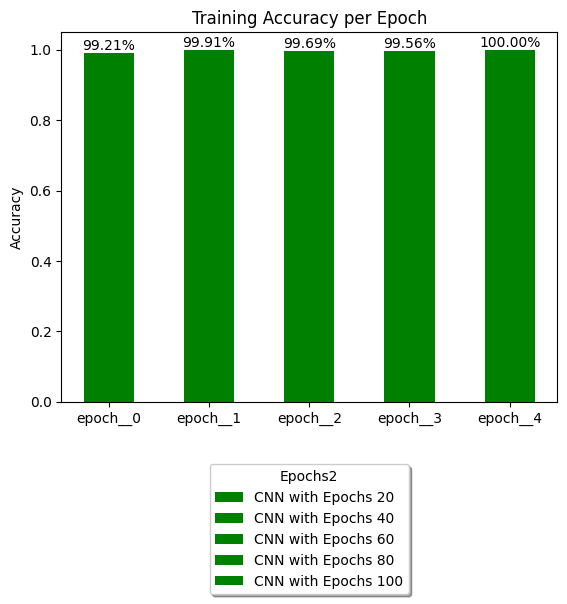

In [93]:
fig, ax2 = plt.subplots()

acc__0 = history__0.history['accuracy'][-1]
acc__1 = history__1.history['accuracy'][-1]
acc__2 = history__2.history['accuracy'][-1]
acc__3 = history__3.history['accuracy'][-1]
acc__4 = history__4.history['accuracy'][-1]
accu___all=[acc__0, acc__1, acc__2, acc__3, acc__4]
epoch__0 = len(history__0.history['accuracy']) 
epoch__1 = len(history__1.history['accuracy'])
epoch__2 = len(history__2.history['accuracy'])
epoch__3 = len(history__3.history['accuracy'])
epoch__4 = len(history__4.history['accuracy'])
epochs2 = ['epoch__0', 'epoch__1', 'epoch__2', 'epoch__3','epoch__4']
bar_labels = ['CNN with Epochs 20', 'CNN with Epochs 40', 'CNN with Epochs 60', 'CNN with Epochs 80', 'CNN with Epochs 100']
bar_colors = ['green', 'green', 'green', 'green','green']
ax2.bar(epochs2, accu___all, label=bar_labels, color=bar_colors,width=0.5)
ax2.set_ylabel('Accuracy')
ax2.set_title('Training Accuracy per Epoch')
ax2.legend(title='Epochs2', loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=1)
for i, ac in enumerate(accu___all):
    plt.text(epochs2[i], ac, f'{ac:.2%}', ha='center', va='bottom')
plt.show()

In [94]:
img2 = cv2.imread('/kaggle/input/brain-tumor-mri-dataset/Testing/glioma/Te-gl_0014.jpg')
img2 = cv2.resize(img2,(150,150))
img_array2 = np.array(img2)
img_array2.shape

(150, 150, 3)

In [95]:
img_array2 = img_array2.reshape(1, 150, 150, 3)
img_array2.shape

(1, 150, 150, 3)

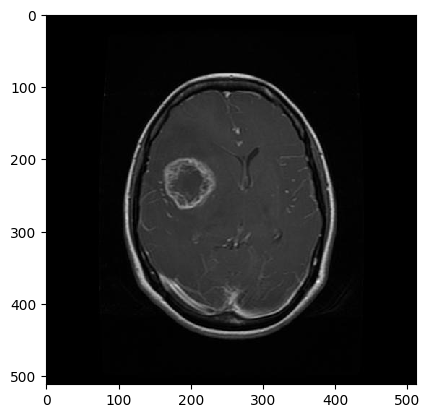

In [96]:
from tensorflow.keras.preprocessing import image
img2 = image.load_img('/kaggle/input/brain-tumor-mri-dataset/Testing/glioma/Te-gl_0014.jpg')
plt.imshow(img2, interpolation='nearest')
plt.show()

In [97]:
a2=model2.predict(img_array2)
indices2 = a2.argmax()
indices2

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step


0

In [98]:
from sklearn.metrics import confusion_matrix
pred2 = model.predict(X_test2)
pred2 = np.argmax(pred2,axis=1)
y_true2 = np.argmax(Y_test2,axis=1)

53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


In [99]:
cm2 = confusion_matrix(y_true2,pred2)
print(cm2)

[[381   3   0   1]
 [ 28 347   5   5]
 [  0   1 474   2]
 [  0   0   0 439]]


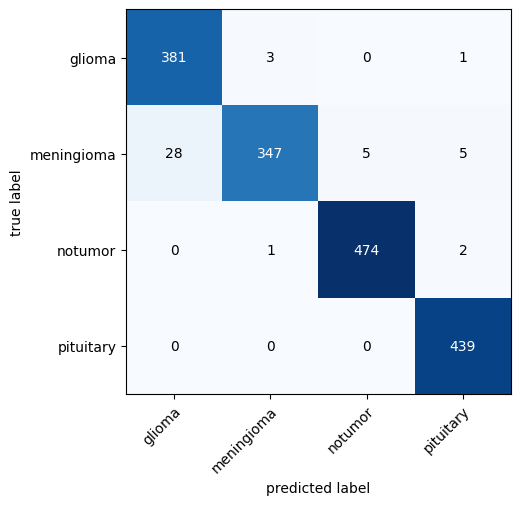

In [100]:
from mlxtend.plotting import plot_confusion_matrix
ax2 = plot_confusion_matrix(conf_mat=cm2,figsize=(5,5),class_names=labels2)
plt.show()

In [101]:
from sklearn.metrics import classification_report
cr2 = classification_report(y_true1,pred1,target_names=labels2)
print(cr2)

              precision    recall  f1-score   support

      glioma       0.90      0.99      0.94       485
  meningioma       0.98      0.88      0.93       509
     notumor       0.99      0.99      0.99       629
   pituitary       0.98      1.00      0.99       484

    accuracy                           0.96      2107
   macro avg       0.96      0.96      0.96      2107
weighted avg       0.97      0.96      0.96      2107



In [102]:
model2.save('braintumor.h5')

For 50% Training Percentage

In [103]:
X_train3 = []
Y_train3 = []
image_size3 = 150
labels3 = ['glioma', 'meningioma', 'notumor', 'pituitary']
for i in labels3:
    folderPath3 = os.path.join('/kaggle/input/brain-tumor-mri-dataset/Training', i)
    for j in os.listdir(folderPath3):
        img3 = cv2.imread(os.path.join(folderPath3, j))
        img3 = cv2.resize(img3, (image_size3, image_size3))
        X_train3.append(img3)
        Y_train3.append(i)
        
for i in labels:
    folderPath3 = os.path.join('/kaggle/input/brain-tumor-mri-dataset/Testing', i)
    for j in os.listdir(folderPath3):
        img3 = cv2.imread(os.path.join(folderPath3, j))
        img3 = cv2.resize(img3, (image_size3, image_size3))
        X_train3.append(img3)
        Y_train3.append(i)
        
X_train3 = np.array(X_train3)
Y_train3 = np.array(Y_train3)

In [104]:
X_train3, Y_train3 = shuffle(X_train3, Y_train3, random_state=101)
X_train3.shape

(7023, 150, 150, 3)

In [106]:
X_train3, X_test3, Y_train3, Y_test3 = train_test_split(X_train3, Y_train3, test_size=0.5, random_state=101)

In [107]:
X_train3.shape

(1755, 150, 150, 3)

In [108]:
X_test3.shape

(1756, 150, 150, 3)

In [109]:
Y_train3_new = []
for i in Y_train3:
    Y_train3_new.append(labels3.index(i))
Y_train3=Y_train3_new
Y_train3 = tf.keras.utils.to_categorical(Y_train3)

Y_test3_new = []
for i in Y_test3:
    Y_test3_new.append(labels3.index(i))
Y_test3=Y_test3_new
Y_test3 = tf.keras.utils.to_categorical(Y_test3)

In [111]:
model3 = tf.keras.Sequential()
model3.add(Conv2D(32, kernel_size=(2, 2), activation='relu', input_shape=(150, 150, 3)))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))
model3.add(Conv2D(64, kernel_size=(2, 2), activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))
model3.add(Flatten())
model3.add(Dense(512, activation='relu'))
model3.add(Dropout(0.25))
model3.add(Dense(4, activation='softmax'))

In [112]:
model3.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 149, 149, 32)   │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 149, 149, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 73, 73, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 73, 73, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 82944)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 512)            │    42,467,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,478,948 (162.04 MB)

 Trainable params: 42,478,756 (162.04 MB)

 Non-trainable params: 192 (768.00 B)

In [113]:
model3.compile(loss='categorical_crossentropy', optimizer='Adamax', metrics=['accuracy'])

In [114]:
history___0 = model3.fit(X_train3, Y_train3, epochs=20, batch_size=40, verbose=2, validation_split=0.1, shuffle=True)

Epoch 1/20


W0000 00:00:1711248614.173319    8822 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1711248621.918326    8822 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


40/40 - 15s - 379ms/step - accuracy: 0.5858 - loss: 19.6543 - val_accuracy: 0.2273 - val_loss: 55.0895
Epoch 2/20
40/40 - 1s - 22ms/step - accuracy: 0.7853 - loss: 0.9766 - val_accuracy: 0.3523 - val_loss: 7.2072
Epoch 3/20
40/40 - 1s - 21ms/step - accuracy: 0.8486 - loss: 0.4370 - val_accuracy: 0.6818 - val_loss: 1.2636
Epoch 4/20
40/40 - 1s - 21ms/step - accuracy: 0.8866 - loss: 0.3289 - val_accuracy: 0.7330 - val_loss: 0.8104
Epoch 5/20
40/40 - 1s - 22ms/step - accuracy: 0.9120 - loss: 0.2289 - val_accuracy: 0.7841 - val_loss: 0.7268
Epoch 6/20
40/40 - 1s - 21ms/step - accuracy: 0.9297 - loss: 0.1929 - val_accuracy: 0.7898 - val_loss: 0.7922
Epoch 7/20
40/40 - 1s - 21ms/step - accuracy: 0.9468 - loss: 0.1677 - val_accuracy: 0.7898 - val_loss: 0.7995
Epoch 8/20
40/40 - 1s - 21ms/step - accuracy: 0.9462 - loss: 0.1422 - val_accuracy: 0.8182 - val_loss: 0.9058
Epoch 9/20
40/40 - 1s - 21ms/step - accuracy: 0.9614 - loss: 0.1125 - val_accuracy: 0.7955 - val_loss: 0.9304
Epoch 10/20
40/40

In [115]:
history___1 = model3.fit(X_train3, Y_train3, epochs=20, batch_size=40, verbose=2, validation_split=0.1, shuffle=True)

Epoch 1/20
40/40 - 1s - 23ms/step - accuracy: 0.9918 - loss: 0.0343 - val_accuracy: 0.8239 - val_loss: 0.8667
Epoch 2/20
40/40 - 1s - 21ms/step - accuracy: 0.9924 - loss: 0.0284 - val_accuracy: 0.8466 - val_loss: 0.8700
Epoch 3/20
40/40 - 1s - 21ms/step - accuracy: 0.9937 - loss: 0.0264 - val_accuracy: 0.8352 - val_loss: 0.9179
Epoch 4/20
40/40 - 1s - 21ms/step - accuracy: 0.9918 - loss: 0.0284 - val_accuracy: 0.8409 - val_loss: 0.8745
Epoch 5/20
40/40 - 1s - 21ms/step - accuracy: 0.9968 - loss: 0.0207 - val_accuracy: 0.8352 - val_loss: 0.8833
Epoch 6/20
40/40 - 1s - 21ms/step - accuracy: 0.9987 - loss: 0.0188 - val_accuracy: 0.8352 - val_loss: 0.8771
Epoch 7/20
40/40 - 1s - 21ms/step - accuracy: 0.9968 - loss: 0.0179 - val_accuracy: 0.8409 - val_loss: 0.9132
Epoch 8/20
40/40 - 1s - 21ms/step - accuracy: 0.9962 - loss: 0.0214 - val_accuracy: 0.8580 - val_loss: 0.8713
Epoch 9/20
40/40 - 1s - 21ms/step - accuracy: 0.9943 - loss: 0.0207 - val_accuracy: 0.8352 - val_loss: 0.8846
Epoch 10/2

In [116]:
history___2 = model3.fit(X_train3, Y_train3, epochs=20, batch_size=40, verbose=2, validation_split=0.1, shuffle=True)

Epoch 1/20
40/40 - 1s - 23ms/step - accuracy: 0.9962 - loss: 0.0178 - val_accuracy: 0.8580 - val_loss: 0.9010
Epoch 2/20
40/40 - 1s - 21ms/step - accuracy: 0.9968 - loss: 0.0173 - val_accuracy: 0.8636 - val_loss: 0.8822
Epoch 3/20
40/40 - 1s - 21ms/step - accuracy: 0.9987 - loss: 0.0108 - val_accuracy: 0.8523 - val_loss: 0.8776
Epoch 4/20
40/40 - 1s - 22ms/step - accuracy: 1.0000 - loss: 0.0085 - val_accuracy: 0.8409 - val_loss: 0.7953
Epoch 5/20
40/40 - 1s - 22ms/step - accuracy: 0.9987 - loss: 0.0064 - val_accuracy: 0.8409 - val_loss: 0.8887
Epoch 6/20
40/40 - 1s - 21ms/step - accuracy: 0.9975 - loss: 0.0124 - val_accuracy: 0.8523 - val_loss: 0.9077
Epoch 7/20
40/40 - 1s - 21ms/step - accuracy: 0.9981 - loss: 0.0085 - val_accuracy: 0.8636 - val_loss: 0.8914
Epoch 8/20
40/40 - 1s - 21ms/step - accuracy: 0.9994 - loss: 0.0081 - val_accuracy: 0.8580 - val_loss: 0.8020
Epoch 9/20
40/40 - 1s - 21ms/step - accuracy: 1.0000 - loss: 0.0052 - val_accuracy: 0.8523 - val_loss: 0.8592
Epoch 10/2

In [117]:
history___3 = model3.fit(X_train3, Y_train3, epochs=20, batch_size=40, verbose=2, validation_split=0.1, shuffle=True)

Epoch 1/20
40/40 - 1s - 22ms/step - accuracy: 0.9962 - loss: 0.0171 - val_accuracy: 0.8636 - val_loss: 0.7912
Epoch 2/20
40/40 - 1s - 21ms/step - accuracy: 0.9987 - loss: 0.0057 - val_accuracy: 0.8636 - val_loss: 0.7990
Epoch 3/20
40/40 - 1s - 22ms/step - accuracy: 0.9962 - loss: 0.0144 - val_accuracy: 0.8409 - val_loss: 0.9483
Epoch 4/20
40/40 - 1s - 22ms/step - accuracy: 0.9975 - loss: 0.0091 - val_accuracy: 0.8636 - val_loss: 0.9266
Epoch 5/20
40/40 - 1s - 21ms/step - accuracy: 0.9962 - loss: 0.0105 - val_accuracy: 0.8750 - val_loss: 0.9254
Epoch 6/20
40/40 - 1s - 22ms/step - accuracy: 1.0000 - loss: 0.0027 - val_accuracy: 0.8693 - val_loss: 0.9203
Epoch 7/20
40/40 - 1s - 22ms/step - accuracy: 1.0000 - loss: 0.0034 - val_accuracy: 0.8693 - val_loss: 0.9142
Epoch 8/20
40/40 - 1s - 22ms/step - accuracy: 1.0000 - loss: 0.0026 - val_accuracy: 0.8807 - val_loss: 0.8960
Epoch 9/20
40/40 - 1s - 21ms/step - accuracy: 0.9994 - loss: 0.0038 - val_accuracy: 0.8750 - val_loss: 0.9170
Epoch 10/2

In [118]:
history___4 = model3.fit(X_train3, Y_train3, epochs=20, batch_size=40, verbose=2, validation_split=0.1, shuffle=True)

Epoch 1/20
40/40 - 1s - 23ms/step - accuracy: 1.0000 - loss: 0.0016 - val_accuracy: 0.8636 - val_loss: 0.9311
Epoch 2/20
40/40 - 1s - 21ms/step - accuracy: 0.9975 - loss: 0.0060 - val_accuracy: 0.8580 - val_loss: 0.9916
Epoch 3/20
40/40 - 1s - 21ms/step - accuracy: 0.9987 - loss: 0.0066 - val_accuracy: 0.8523 - val_loss: 0.9237
Epoch 4/20
40/40 - 1s - 21ms/step - accuracy: 0.9968 - loss: 0.0087 - val_accuracy: 0.8750 - val_loss: 0.8566
Epoch 5/20
40/40 - 1s - 21ms/step - accuracy: 0.9994 - loss: 0.0033 - val_accuracy: 0.8807 - val_loss: 0.8572
Epoch 6/20
40/40 - 1s - 21ms/step - accuracy: 0.9987 - loss: 0.0031 - val_accuracy: 0.8864 - val_loss: 0.7559
Epoch 7/20
40/40 - 1s - 22ms/step - accuracy: 0.9994 - loss: 0.0033 - val_accuracy: 0.8750 - val_loss: 0.7472
Epoch 8/20
40/40 - 1s - 22ms/step - accuracy: 1.0000 - loss: 0.0015 - val_accuracy: 0.8580 - val_loss: 0.8285
Epoch 9/20
40/40 - 1s - 21ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 0.8693 - val_loss: 0.8327
Epoch 10/2

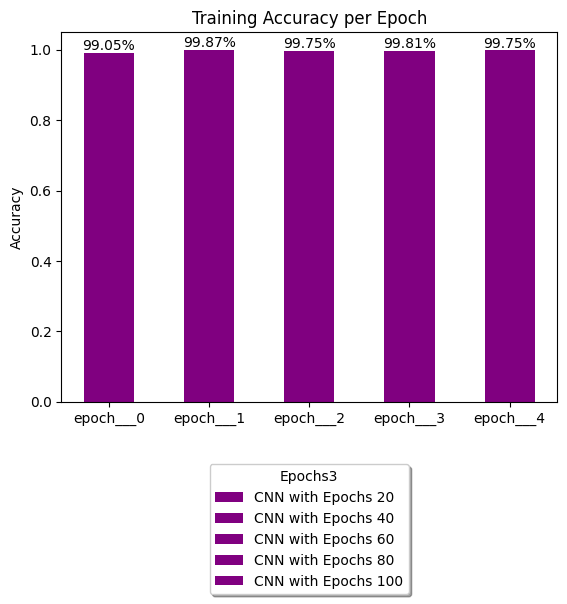

In [119]:
fig, ax3 = plt.subplots()

acc___0 = history___0.history['accuracy'][-1]
acc___1 = history___1.history['accuracy'][-1]
acc___2 = history___2.history['accuracy'][-1]
acc___3 = history___3.history['accuracy'][-1]
acc___4 = history___4.history['accuracy'][-1]
accu____all=[acc___0, acc___1, acc___2, acc___3, acc___4]
epoch___0 = len(history___0.history['accuracy']) 
epoch___1 = len(history___1.history['accuracy'])
epoch___2 = len(history___2.history['accuracy'])
epoch___3 = len(history___3.history['accuracy'])
epoch___4 = len(history___4.history['accuracy'])
epochs3 = ['epoch___0', 'epoch___1', 'epoch___2', 'epoch___3','epoch___4']
bar_labels = ['CNN with Epochs 20', 'CNN with Epochs 40', 'CNN with Epochs 60', 'CNN with Epochs 80', 'CNN with Epochs 100']
bar_colors = ['purple', 'purple', 'purple', 'purple','purple']
ax3.bar(epochs3, accu___all, label=bar_labels, color=bar_colors,width=0.5)
ax3.set_ylabel('Accuracy')
ax3.set_title('Training Accuracy per Epoch')
ax3.legend(title='Epochs3', loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=1)
for i, ac in enumerate(accu____all):
    plt.text(epochs3[i], ac, f'{ac:.2%}', ha='center', va='bottom')
plt.show()

# train_acc = (history.history['accuracy'], history1.history['accuracy'], history2.history['accuracy'], history3.history['accuracy'])
# plt.plot(epochs, acc_all, 'b')
# plt.title('Training Accuracy per Epoch')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')

# plt.show()

In [120]:
img3 = cv2.imread('/kaggle/input/brain-tumor-mri-dataset/Testing/glioma/Te-gl_0014.jpg')
img3 = cv2.resize(img3,(150,150))
img_array3 = np.array(img3)
img_array3.shape

(150, 150, 3)

In [121]:
img_array3 = img_array3.reshape(1, 150, 150, 3)
img_array3.shape

(1, 150, 150, 3)

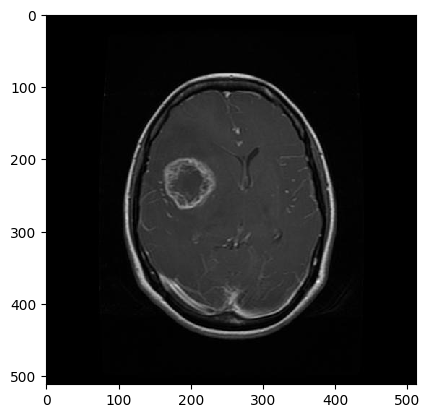

In [122]:
from tensorflow.keras.preprocessing import image
img3 = image.load_img('/kaggle/input/brain-tumor-mri-dataset/Testing/glioma/Te-gl_0014.jpg')
plt.imshow(img3, interpolation='nearest')
plt.show()

In [123]:
a3=model3.predict(img_array3)
indices3 = a3.argmax()
indices3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step


0

In [124]:
from sklearn.metrics import confusion_matrix
pred3 = model.predict(X_test3)
pred3 = np.argmax(pred3,axis=1)
y_true3 = np.argmax(Y_test3,axis=1)

55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


In [125]:
cm3 = confusion_matrix(y_true3,pred3)
print(cm3)

[[404   4   0   0]
 [ 31 355   6   2]
 [  0   2 488   2]
 [  0   0   0 462]]


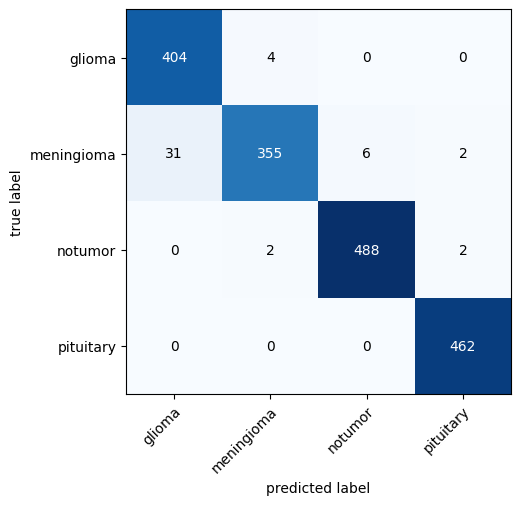

In [126]:
from mlxtend.plotting import plot_confusion_matrix
ax3 = plot_confusion_matrix(conf_mat=cm3,figsize=(5,5),class_names=labels3)
plt.show()

In [129]:
from sklearn.metrics import classification_report
cr3 = classification_report(y_true3,pred3,target_names=labels3)
print(cr3)

              precision    recall  f1-score   support

      glioma       0.93      0.99      0.96       408
  meningioma       0.98      0.90      0.94       394
     notumor       0.99      0.99      0.99       492
   pituitary       0.99      1.00      1.00       462

    accuracy                           0.97      1756
   macro avg       0.97      0.97      0.97      1756
weighted avg       0.97      0.97      0.97      1756



In [130]:
model3.save('braintumor.h5')

For 40% Training Percentage 

In [140]:
X_train4 = []
Y_train4 = []
image_size4 = 150
labels4 = ['glioma', 'meningioma', 'notumor', 'pituitary']
for i in labels4:
    folderPath4 = os.path.join('/kaggle/input/brain-tumor-mri-dataset/Training', i)
    for j in os.listdir(folderPath4):
        img4 = cv2.imread(os.path.join(folderPath4, j))
        img4 = cv2.resize(img4, (image_size4, image_size4))
        X_train4.append(img4)
        Y_train4.append(i)
        
for i in labels:
    folderPath4 = os.path.join('/kaggle/input/brain-tumor-mri-dataset/Testing', i)
    for j in os.listdir(folderPath4):
        img4 = cv2.imread(os.path.join(folderPath4, j))
        img4 = cv2.resize(img4, (image_size4, image_size4))
        X_train4.append(img4)
        Y_train4.append(i)
        
X_train4 = np.array(X_train4)
Y_train4 = np.array(Y_train4)

In [141]:
X_train4, Y_train4 = shuffle(X_train4, Y_train4, random_state=101)
X_train4.shape

(7023, 150, 150, 3)

In [142]:
X_train4, X_test4, Y_train4, Y_test4 = train_test_split(X_train4, Y_train4, test_size=0.6, random_state=101)

In [143]:
X_train4.shape

(2809, 150, 150, 3)

In [144]:
X_test4.shape

(4214, 150, 150, 3)

In [145]:
Y_train4_new = []
for i in Y_train4:
    Y_train4_new.append(labels4.index(i))
Y_train4=Y_train4_new
Y_train4 = tf.keras.utils.to_categorical(Y_train4)

Y_test4_new = []
for i in Y_test4:
    Y_test4_new.append(labels4.index(i))
Y_test4=Y_test4_new
Y_test4 = tf.keras.utils.to_categorical(Y_test4)

In [147]:
model4 = tf.keras.Sequential()
model4.add(Conv2D(32, kernel_size=(2, 2), activation='relu', input_shape=(150, 150, 3)))
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Dropout(0.25))
model4.add(Conv2D(64, kernel_size=(2, 2), activation='relu'))
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Dropout(0.25))
model4.add(Flatten())
model4.add(Dense(512, activation='relu'))
model4.add(Dropout(0.25))
model4.add(Dense(4, activation='softmax'))

In [148]:
model4.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)              │ (None, 149, 149, 32)   │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 149, 149, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30 (Dropout)            │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 73, 73, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 73, 73, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 82944)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 512)            │    42,467,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_32 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,478,948 (162.04 MB)

 Trainable params: 42,478,756 (162.04 MB)

 Non-trainable params: 192 (768.00 B)

In [149]:
model4.compile(loss='categorical_crossentropy', optimizer='Adamax', metrics=['accuracy'])

In [150]:
history____0 = model4.fit(X_train4, Y_train4, epochs=20, batch_size=40, verbose=2, validation_split=0.1, shuffle=True)

Epoch 1/20


W0000 00:00:1711248910.008597    8822 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1711248917.671697    8820 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1711248918.211406    8819 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


64/64 - 16s - 250ms/step - accuracy: 0.6879 - loss: 8.3302 - val_accuracy: 0.4840 - val_loss: 5.6975
Epoch 2/20
64/64 - 1s - 21ms/step - accuracy: 0.8576 - loss: 0.7120 - val_accuracy: 0.7687 - val_loss: 0.9658
Epoch 3/20
64/64 - 1s - 21ms/step - accuracy: 0.9027 - loss: 0.3245 - val_accuracy: 0.8221 - val_loss: 0.5381
Epoch 4/20
64/64 - 1s - 21ms/step - accuracy: 0.9509 - loss: 0.1652 - val_accuracy: 0.8363 - val_loss: 0.7003
Epoch 5/20
64/64 - 1s - 21ms/step - accuracy: 0.9612 - loss: 0.1238 - val_accuracy: 0.8399 - val_loss: 0.9186
Epoch 6/20
64/64 - 1s - 21ms/step - accuracy: 0.9676 - loss: 0.0951 - val_accuracy: 0.8292 - val_loss: 1.1298
Epoch 7/20
64/64 - 1s - 21ms/step - accuracy: 0.9763 - loss: 0.0852 - val_accuracy: 0.8327 - val_loss: 1.0977
Epoch 8/20
64/64 - 1s - 21ms/step - accuracy: 0.9711 - loss: 0.0922 - val_accuracy: 0.8149 - val_loss: 1.2145
Epoch 9/20
64/64 - 1s - 21ms/step - accuracy: 0.9798 - loss: 0.0610 - val_accuracy: 0.8114 - val_loss: 1.2220
Epoch 10/20
64/64 -

In [151]:
history____1 = model4.fit(X_train4, Y_train4, epochs=20, batch_size=40, verbose=2, validation_split=0.1, shuffle=True)

Epoch 1/20
64/64 - 1s - 22ms/step - accuracy: 0.9976 - loss: 0.0131 - val_accuracy: 0.8470 - val_loss: 1.1640
Epoch 2/20
64/64 - 1s - 21ms/step - accuracy: 0.9960 - loss: 0.0126 - val_accuracy: 0.8470 - val_loss: 1.1894
Epoch 3/20
64/64 - 1s - 21ms/step - accuracy: 0.9964 - loss: 0.0135 - val_accuracy: 0.8327 - val_loss: 1.1328
Epoch 4/20
64/64 - 1s - 21ms/step - accuracy: 0.9945 - loss: 0.0162 - val_accuracy: 0.8221 - val_loss: 1.2844
Epoch 5/20
64/64 - 1s - 21ms/step - accuracy: 0.9953 - loss: 0.0169 - val_accuracy: 0.8541 - val_loss: 1.1683
Epoch 6/20
64/64 - 1s - 21ms/step - accuracy: 0.9956 - loss: 0.0164 - val_accuracy: 0.8256 - val_loss: 1.2823
Epoch 7/20
64/64 - 1s - 21ms/step - accuracy: 0.9968 - loss: 0.0142 - val_accuracy: 0.8612 - val_loss: 1.0407
Epoch 8/20
64/64 - 1s - 21ms/step - accuracy: 0.9976 - loss: 0.0090 - val_accuracy: 0.8577 - val_loss: 1.0278
Epoch 9/20
64/64 - 1s - 21ms/step - accuracy: 0.9945 - loss: 0.0203 - val_accuracy: 0.8327 - val_loss: 1.2690
Epoch 10/2

In [152]:
history____2 = model4.fit(X_train4, Y_train4, epochs=20, batch_size=40, verbose=2, validation_split=0.1, shuffle=True)

Epoch 1/20
64/64 - 1s - 22ms/step - accuracy: 0.9984 - loss: 0.0062 - val_accuracy: 0.8541 - val_loss: 1.1771
Epoch 2/20
64/64 - 1s - 21ms/step - accuracy: 0.9960 - loss: 0.0113 - val_accuracy: 0.8541 - val_loss: 1.0390
Epoch 3/20
64/64 - 1s - 21ms/step - accuracy: 0.9968 - loss: 0.0098 - val_accuracy: 0.8612 - val_loss: 1.0765
Epoch 4/20
64/64 - 1s - 21ms/step - accuracy: 0.9972 - loss: 0.0103 - val_accuracy: 0.8719 - val_loss: 1.0248
Epoch 5/20
64/64 - 1s - 21ms/step - accuracy: 0.9968 - loss: 0.0129 - val_accuracy: 0.8577 - val_loss: 1.1338
Epoch 6/20
64/64 - 1s - 21ms/step - accuracy: 0.9972 - loss: 0.0101 - val_accuracy: 0.8399 - val_loss: 1.3101
Epoch 7/20
64/64 - 1s - 21ms/step - accuracy: 0.9972 - loss: 0.0102 - val_accuracy: 0.8434 - val_loss: 1.3584
Epoch 8/20
64/64 - 1s - 21ms/step - accuracy: 0.9956 - loss: 0.0198 - val_accuracy: 0.8434 - val_loss: 1.3002
Epoch 9/20
64/64 - 1s - 21ms/step - accuracy: 0.9953 - loss: 0.0151 - val_accuracy: 0.8683 - val_loss: 1.0237
Epoch 10/2

In [153]:
history____3 = model4.fit(X_train4, Y_train4, epochs=20, batch_size=40, verbose=2, validation_split=0.1, shuffle=True)

Epoch 1/20
64/64 - 1s - 22ms/step - accuracy: 0.9976 - loss: 0.0119 - val_accuracy: 0.8221 - val_loss: 1.4532
Epoch 2/20
64/64 - 2s - 39ms/step - accuracy: 0.9980 - loss: 0.0071 - val_accuracy: 0.8541 - val_loss: 1.2272
Epoch 3/20
64/64 - 1s - 21ms/step - accuracy: 0.9984 - loss: 0.0041 - val_accuracy: 0.8754 - val_loss: 1.1058
Epoch 4/20
64/64 - 1s - 21ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 0.8754 - val_loss: 1.0351
Epoch 5/20
64/64 - 1s - 21ms/step - accuracy: 0.9996 - loss: 0.0014 - val_accuracy: 0.8790 - val_loss: 1.1698
Epoch 6/20
64/64 - 1s - 21ms/step - accuracy: 1.0000 - loss: 4.1593e-04 - val_accuracy: 0.8861 - val_loss: 1.1600
Epoch 7/20
64/64 - 1s - 21ms/step - accuracy: 0.9968 - loss: 0.0111 - val_accuracy: 0.8648 - val_loss: 1.0585
Epoch 8/20
64/64 - 1s - 21ms/step - accuracy: 0.9972 - loss: 0.0248 - val_accuracy: 0.8826 - val_loss: 0.9914
Epoch 9/20
64/64 - 1s - 21ms/step - accuracy: 0.9984 - loss: 0.0104 - val_accuracy: 0.8719 - val_loss: 0.9477
Epoch 

In [154]:
history____4 = model4.fit(X_train4, Y_train4, epochs=20, batch_size=40, verbose=2, validation_split=0.1, shuffle=True)

Epoch 1/20
64/64 - 1s - 22ms/step - accuracy: 0.9996 - loss: 8.6472e-04 - val_accuracy: 0.8968 - val_loss: 0.9703
Epoch 2/20
64/64 - 1s - 21ms/step - accuracy: 0.9992 - loss: 0.0033 - val_accuracy: 0.8932 - val_loss: 1.0010
Epoch 3/20
64/64 - 1s - 21ms/step - accuracy: 0.9988 - loss: 0.0019 - val_accuracy: 0.8826 - val_loss: 1.0741
Epoch 4/20
64/64 - 1s - 21ms/step - accuracy: 0.9996 - loss: 0.0018 - val_accuracy: 0.8790 - val_loss: 1.0389
Epoch 5/20
64/64 - 1s - 21ms/step - accuracy: 0.9984 - loss: 0.0038 - val_accuracy: 0.8612 - val_loss: 1.2044
Epoch 6/20
64/64 - 1s - 21ms/step - accuracy: 0.9988 - loss: 0.0057 - val_accuracy: 0.8754 - val_loss: 1.0029
Epoch 7/20
64/64 - 1s - 21ms/step - accuracy: 0.9992 - loss: 0.0056 - val_accuracy: 0.8719 - val_loss: 1.1736
Epoch 8/20
64/64 - 1s - 21ms/step - accuracy: 0.9988 - loss: 0.0056 - val_accuracy: 0.8790 - val_loss: 1.0848
Epoch 9/20
64/64 - 1s - 21ms/step - accuracy: 0.9988 - loss: 0.0049 - val_accuracy: 0.8719 - val_loss: 1.1948
Epoch 

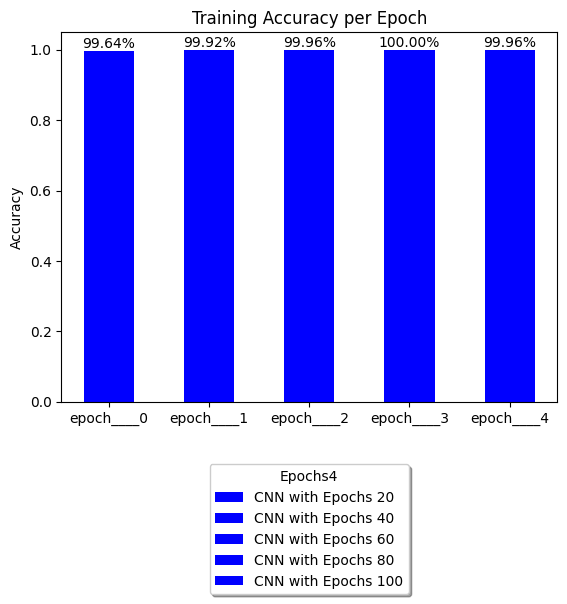

In [155]:
fig, ax4 = plt.subplots()

acc____0 = history____0.history['accuracy'][-1]
acc____1 = history____1.history['accuracy'][-1]
acc____2 = history____2.history['accuracy'][-1]
acc____3 = history____3.history['accuracy'][-1]
acc____4 = history____4.history['accuracy'][-1]
accu_____all=[acc____0, acc____1, acc____2, acc____3, acc____4]
epoch____0 = len(history____0.history['accuracy']) 
epoch____1 = len(history____1.history['accuracy'])
epoch____2 = len(history____2.history['accuracy'])
epoch____3 = len(history____3.history['accuracy'])
epoch____4 = len(history____4.history['accuracy'])
epochs4 = ['epoch____0', 'epoch____1', 'epoch____2', 'epoch____3','epoch____4']
bar_labels = ['CNN with Epochs 20', 'CNN with Epochs 40', 'CNN with Epochs 60', 'CNN with Epochs 80', 'CNN with Epochs 100']
bar_colors = ['blue', 'blue', 'blue', 'blue','blue']
ax4.bar(epochs4, accu_____all, label=bar_labels, color=bar_colors,width=0.5)
ax4.set_ylabel('Accuracy')
ax4.set_title('Training Accuracy per Epoch')
ax4.legend(title='Epochs4', loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=1)
for i, ac in enumerate(accu_____all):
    plt.text(epochs4[i], ac, f'{ac:.2%}', ha='center', va='bottom')
plt.show()

# train_acc = (history.history['accuracy'], history1.history['accuracy'], history2.history['accuracy'], history3.history['accuracy'])
# plt.plot(epochs, acc_all, 'b')
# plt.title('Training Accuracy per Epoch')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')

# plt.show()

In [156]:
img4 = cv2.imread('/kaggle/input/brain-tumor-mri-dataset/Testing/glioma/Te-gl_0014.jpg')
img4 = cv2.resize(img4,(150,150))
img_array4 = np.array(img4)
img_array4.shape

(150, 150, 3)

In [157]:
img_array4 = img_array4.reshape(1, 150, 150, 3)
img_array4.shape

(1, 150, 150, 3)

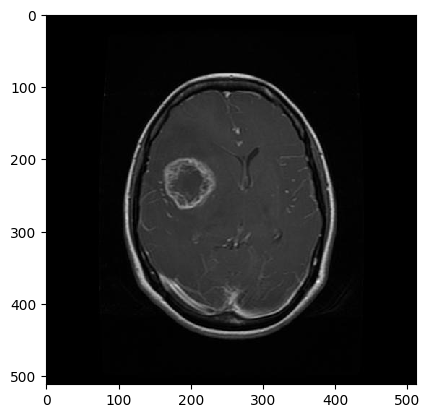

In [158]:
from tensorflow.keras.preprocessing import image
img4 = image.load_img('/kaggle/input/brain-tumor-mri-dataset/Testing/glioma/Te-gl_0014.jpg')
plt.imshow(img4, interpolation='nearest')
plt.show()

In [159]:
a4=model4.predict(img_array4)
indices4 = a4.argmax()
indices4

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step


0

In [160]:
from sklearn.metrics import confusion_matrix
pred4 = model.predict(X_test4)
pred4 = np.argmax(pred4,axis=1)
y_true4 = np.argmax(Y_test4,axis=1)

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [161]:
cm4 = confusion_matrix(y_true4,pred4)
print(cm4)

[[ 959   14    0    1]
 [  81  906    9   11]
 [   3    2 1205    6]
 [   1    0    0 1016]]


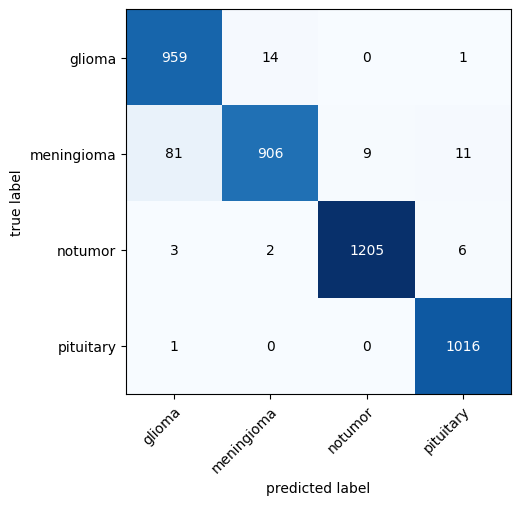

In [162]:
from mlxtend.plotting import plot_confusion_matrix
ax4 = plot_confusion_matrix(conf_mat=cm4,figsize=(5,5),class_names=labels4)
plt.show()

In [163]:
from sklearn.metrics import classification_report
cr4 = classification_report(y_true4,pred4,target_names=labels4)
print(cr4)

              precision    recall  f1-score   support

      glioma       0.92      0.98      0.95       974
  meningioma       0.98      0.90      0.94      1007
     notumor       0.99      0.99      0.99      1216
   pituitary       0.98      1.00      0.99      1017

    accuracy                           0.97      4214
   macro avg       0.97      0.97      0.97      4214
weighted avg       0.97      0.97      0.97      4214



In [164]:
model4.save('braintumor.h5')

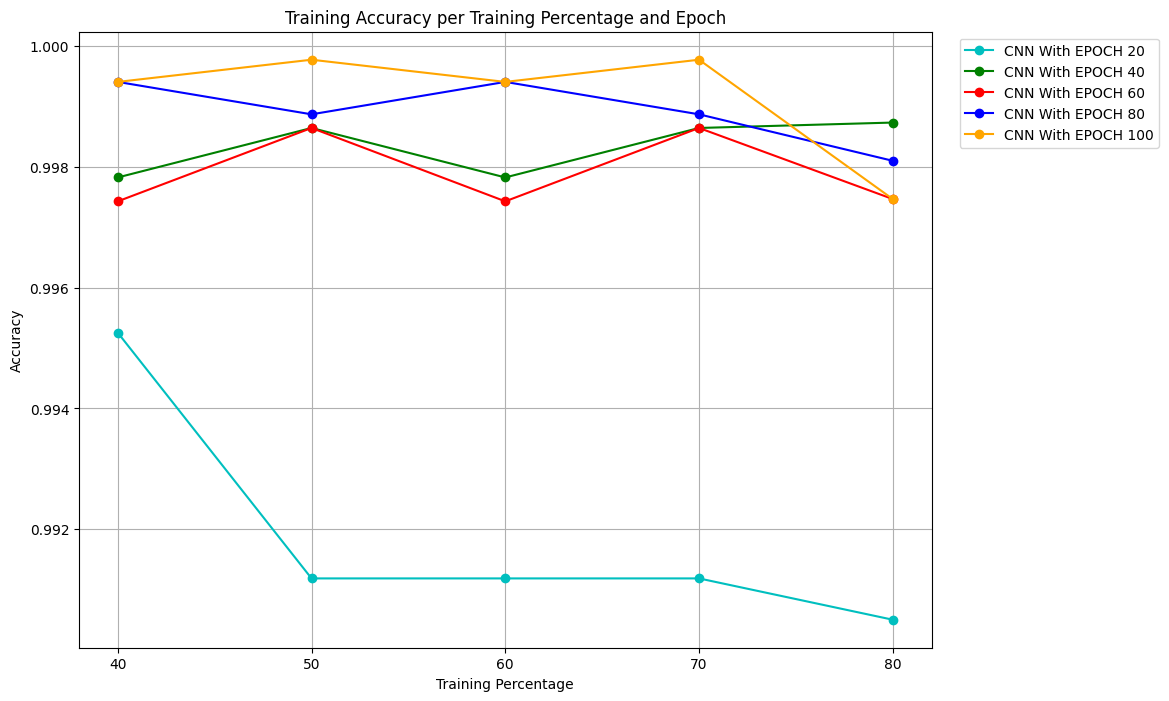

In [171]:
TP = [40, 50, 60, 70, 80]
acc = history.history['accuracy'][-1]
acc1 = history1.history['accuracy'][-1]
acc2 = history2.history['accuracy'][-1]
acc3 = history3.history['accuracy'][-1]
acc4 = history4.history['accuracy'][-1]
acc_0 = history_0.history['accuracy'][-1]
acc_1 = history_1.history['accuracy'][-1]
acc_2 = history_2.history['accuracy'][-1]
acc_3 = history_3.history['accuracy'][-1]
acc_4 = history_4.history['accuracy'][-1]
acc__0 = history__0.history['accuracy'][-1]
acc__1 = history__1.history['accuracy'][-1]
acc__2 = history__2.history['accuracy'][-1]
acc__3 = history__3.history['accuracy'][-1]
acc__4 = history__4.history['accuracy'][-1]
acc___0 = history___0.history['accuracy'][-1]
acc___1 = history___1.history['accuracy'][-1]
acc___2 = history___2.history['accuracy'][-1]
acc___3 = history___3.history['accuracy'][-1]
acc___4 = history___4.history['accuracy'][-1]
acc____0 = history____0.history['accuracy'][-1]
acc____1 = history____1.history['accuracy'][-1]
acc____2 = history____2.history['accuracy'][-1]
acc____3 = history____3.history['accuracy'][-1]
acc____4 = history____4.history['accuracy'][-1]

accu_all=[acc, acc_0, acc_0, acc_0, acc___0]
accu__all=[acc1, acc_1, acc1, acc_1, acc___1]
accu___all=[acc2, acc_2, acc2, acc_2, acc___2]
accu____all=[acc3, acc_3, acc3, acc_3, acc___3]
accu_____all=[acc4, acc_4, acc4, acc_4, acc___4]
accuracy = [accu_all,accu__all,accu___all,accu____all,accu_____all]


fig = plt.figure(figsize=(11,8))
ax1 = fig.add_subplot(111)

ax1.plot(TP, accuracy[0], label='CNN With EPOCH 20', color='c', marker='o')
ax1.plot(TP, accuracy[1], label='CNN With EPOCH 40', color='g', marker='o')
ax1.plot(TP, accuracy[2], label='CNN With EPOCH 60', color='r', marker='o')
ax1.plot(TP, accuracy[3], label='CNN With EPOCH 80', color='b', marker='o')
ax1.plot(TP, accuracy[4], label='CNN With EPOCH 100', color='orange', marker='o')


plt.xticks(TP)
plt.xlabel('Training Percentage')
plt.ylabel('Accuracy')
ax1.set_title('Training Accuracy per Training Percentage and Epoch')
handles, labels = ax1.get_legend_handles_labels()
lgd = ax1.legend(handles, labels, loc='upper center', bbox_to_anchor=(1.15,1))
ax1.grid('on')

plt.savefig('cnn')